## k-means Clustering
K-means clustering is an **unsupervised machine learning algorithm** used for partitioning a dataset into k distinct clusters. Each cluster contains data points that are more similar to each other than to those in other clusters, based on a predefined distance-based metric(e.g., Euclidean distance). It works with **unlabeled data** to find groupings.

### Algorithm:

1. **Initialization:** Randomly select k data points from the dataset as the initial centroids.
2. **Assignment:** Assign each data point to the cluster with the nearest centroid. This creates k clusters.
3. **Update:** Recalculate centroids based on the mean of assigned points.
4. **Iteration:** Repeat steps 2 and 3 until the centroids do not change significantly (convergence) or a maximum number of iterations is reached.

### Use Cases
- Customer segmentation.
- Image compression.
- Document clustering.

### Question: 
Implement the k-means clustering algorithm from scratch. Given a dataset, group the points into k clusters. 


Converged in 11 iterations.


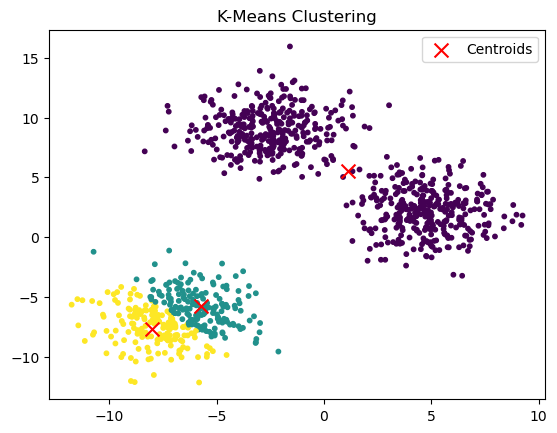

In [4]:
import numpy as np 

class Kmeans:
    """
    Initialize the KMeans class.
    """
    def __init__(self, n_clusters, max_iters, tol):
        self.n_clusters = n_clusters      # int, number of clusters (k)
        self.max_iters = max_iters        # int, maximum number of iterations
        self.tol = tol                    #float, tolerance for convergence 
        self.centroids = 0

    """
    Perform K-means clustering on the data.
    """
    def fit(self, data):
        #step 1: Randomly initialize centroids
        np.random.seed(42)                #For reproducibility
        indices = np.random.choice(data.shape[0], self.n_clusters, replace = False)
        self.centroids = data[indices]
        
        #Iterates until centroids stabilize:
        for iteration in range(self.max_iters):
            #step 2: Assign clusters
            labels = self._assign_clusters(data)
            #step 3: Update centroids
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            # step 4: check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                print(f"Converged in {iteration+1} iterations.")
                break
            self.centroids = new_centroids
        self.labels = labels
    """
    Assign each data point to the closest centroid.
    """
    def _assign_clusters(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis = 2)
        return np.argmin(distances, axis = 1)

    """
    Predict the closest cluster for new data points.
    """
    def predict(self, data):
        return self._assign_clusters(data)



#---------------------
#Example
#---------------------

# Generate some synthetic data
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=1000, cluster_std=1.8, random_state=42)


# Apply KMeans
kmeans = Kmeans(n_clusters=3, max_iters=100, tol=1e-2)
kmeans.fit(data)


# Plot the results
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels, cmap='viridis', s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()
        
    

#### Follow-up: 
How do you handle scenarios where the clusters do not converge?

- **Preprocess the data** by removing noise or outliers or scaling the data to normalize or standardize the dataset to ensure that all features contribute equally.
- **Use better initialization** by **manually selecting initial centroids** (init='k-means++' or 'random') to maximize their distance and **performing multiple runs** with different initializations.
- **Increase the number of clusters(n_clusters)** to refine the value of k. 
- **Increase the maximum number of iterations (max_iter)** for complex datasets.
- **Increase the convergence threshold (tol)** to allow centroids to stabilize in fewer iterations.
- **Use mini-batch K-means (batch_size)** for very large datasets to process a small random subset of the dataset at each iteration.


##### Example: 

Improving K-Means with better initialization and preprocessing using the scikit-learn library. The KMeans module in the scikit-learn library makes applying K-means clustering much easier and more efficient.

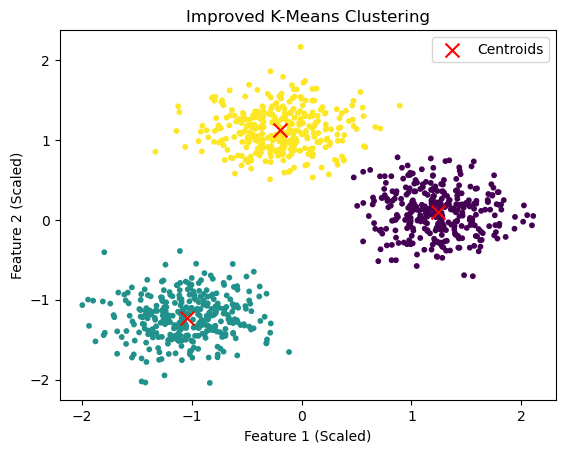

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means with improved initialization
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, tol=1e-4, n_init=10)
kmeans.fit(data_scaled)

# Plot the results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("Improved K-Means Clustering")
plt.legend()
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()